How many matches do You wish to play? 
15
Number of matches: 15

Match: 1
Choose: Rock Paper, Scissors
Your turn: Rock
AI chooses: Scissors
Won 1 point

Match: 2
Choose: Rock Paper, Scissors
Your turn: Rock
[0.31, 0.37, 0.32]
AI chooses: Paper
Loss: 1 point

Match: 3
Choose: Rock Paper, Scissors
Your turn: Rock
[0.29, 0.41, 0.3]
AI chooses: Rock
Draw

Match: 4
Choose: Rock Paper, Scissors
Your turn: Rock
[0.26999999999999996, 0.44999999999999996, 0.27999999999999997]
AI chooses: Paper
Loss: 1 point

Match: 5
Choose: Rock Paper, Scissors
Your turn: Rock
[0.24999999999999997, 0.48999999999999994, 0.25999999999999995]
AI chooses: Paper
Loss: 1 point

Match: 6
Choose: Rock Paper, Scissors
Your turn: Rock
[0.22999999999999998, 0.5299999999999999, 0.23999999999999996]
AI chooses: Scissors
Won 1 point

Match: 7
Choose: Rock Paper, Scissors
Your turn: Rock
[0.21, 0.57, 0.21999999999999997]
AI chooses: Paper
Loss: 1 point

Match: 8
Choose: Rock Paper, Scissors
Your turn: Rock
[0.19, 0.61, 0.199

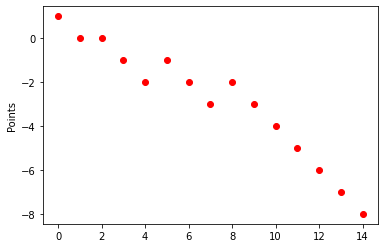

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

states = ['Rock', 'Paper', 'Scissors']
p_entry = [0.33, 0.33, 0.34] # Initial probability for each state

      # Rock | Paper | Scissors 
p_rock = [0.33, 0.33, 0.34]      # Rock
p_paper = [0.33, 0.33, 0.34]     # Paper
p_scissors = [0.33, 0.33, 0.34]  # Scissors

points = 0 # Sum of points gained by the player (reward: +1, draw: +0, loss: -1)

def CheckResult(move, response, points):
  """ Checks result of the AI response """
  # Draw situation
  if(move == response):
    print('Draw')
  else:
    # Win situation
    if((move == 'Rock' and response == 'Scissors') or (move == 'Paper' and response == 'Rock') or (move == 'Scissors' and response == 'Paper')):
      points += 1
      print('You won 1 point')
    # Loss situation
    else: 
      points -= 1
      print('You Lost: 1 point')
  return points

def Learn(p, index):
  """ Increase or decrease probability of next input value """
  if (index == 0):
    p[1] += 0.04
    p[0] -= 0.02
    p[2] -= 0.02
  elif (index == 1):
    p[2] += 0.04
    p[1] -= 0.02
    p[0] -= 0.02
  else:
    p[0] += 0.04
    p[1] -= 0.02
    p[2] -= 0.02

numberOfIterations = int(input('How many matches do You wish to play? \n'))
print('Number of matches: ' + str(numberOfIterations) + '\n')

matches = np.zeros(numberOfIterations) # Array of played matches

# First match
print ('Match: 1')
print('Choose: Rock Paper, Scissors')
lastUserInput = input('Your turn: ')

answer = np.random.choice(states, replace=True, p=p_entry)
print('AI chooses: ' + str(answer))

matches[0] = CheckResult(lastUserInput, answer, points)

# Main loop
for i in range (numberOfIterations - 1):

  print('\nMatch: ' + str(i+2))
  print('Choose: Rock Paper, Scissors')
  userInput = input('Your turn: ')

  if(lastUserInput == 'Rock'):
    answer = np.random.choice(states, replace=True, p=p_rock)
    if(userInput == states[0]): # Rock
      Learn(p_rock, 0)
    if(userInput == states[1]): # Paper
      Learn(p_rock, 1)
    if(userInput == states[2]): # Scissors
      Learn(p_rock, 2)
  print(p_rock)

  if(lastUserInput == 'Paper'):
    answer = np.random.choice(states, replace=True, p=p_paper)
    if(userInput == states[0]): # Rock
      Learn(p_paper, 0)
    if(userInput == states[1]): # Paper
      Learn(p_paper, 1)
    if(userInput == states[2]): # Scissors
      Learn(p_paper, 2)
  
  if(lastUserInput == 'Scissors'):
    answer = np.random.choice(states, replace=True, p=p_scissors)
    if(userInput == states[0]): # Rock
      Learn(p_scissors, 0)
    if(userInput == states[1]): # Paper
      Learn(p_scissors, 1)
    if(userInput == states[2]): # Scissors
      Learn(p_scissors, 2)

  print('AI chooses: ' + str(answer))

  matches[i+1] = matches[i] + CheckResult(userInput, answer, points) # Add point into the array
  
  lastUserInput = userInput # k-1 = k

print('\n')
# Print array of point sum and draw graph
print(matches)
plt.plot(matches, 'ro')
plt.ylabel('Points')
plt.show()
      
